Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.8995 - loss: 0.3271 - val_accuracy: 0.9841 - val_loss: 0.0502
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9841 - loss: 0.0489 - val_accuracy: 0.9828 - val_loss: 0.0507
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9894 - loss: 0.0338 - val_accuracy: 0.9906 - val_loss: 0.0280
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9923 - loss: 0.0243 - val_accuracy: 0.9899 - val_loss: 0.0310
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9936 - loss: 0.0189 - val_accuracy: 0.9899 - val_loss: 0.0300
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9877 - loss: 0.0346



🎉 Test Accuracy: 98.99%
Model saved as mnist_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


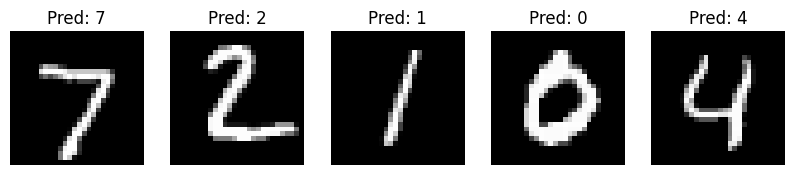

In [ ]:

# 🤖 Train Number-Reading Robot
# Let's teach our robot to recognize handwritten numbers!

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


# Step 1: Get Number Pictures
# We'll use the MNIST dataset with 60,000 training images


(train_images, train_labels), (test_images, test_labels) = (
    tf.keras.datasets.mnist.load_data()
)


# Step 2: Clean the Pictures
# Make them nice for our robot!

# Normalize pixel values (0-1) and add channel dimension
train_images = tf.expand_dims(train_images / 255.0, axis=-1)
test_images = tf.expand_dims(test_images / 255.0, axis=-1)

# Convert labels to one-hot encoding
train_labels = tf.one_hot(train_labels, depth=10)
test_labels = tf.one_hot(test_labels, depth=10)

# Step 3: Build Robot Brain
# Our CNN architecture:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Step 4: Train the Robot
history = model.fit(
    train_images, train_labels, epochs=5, validation_data=(test_images, test_labels)
)

# Step 5: Test Our Robot
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\n🎉 Test Accuracy: {test_acc*100:.2f}%")


# Step 6: Save the Model
# So we can use it in our app!
model.save("mnist_model.h5")
print("Model saved as mnist_model.h5")


# Try Some Predictions
sample_images = test_images[:5]
predictions = model.predict(sample_images)
predicted_labels = tf.argmax(predictions, axis=1)

plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(tf.squeeze(sample_images[i]), cmap="gray")
    plt.title(f"Pred: {predicted_labels[i].numpy()}")
    plt.axis("off")
plt.show()